In [113]:
from matplotlib import pyplot as plt
import numpy as np

In [104]:
padding=10000
initial_state='##.#....#..#......#..######..#.####.....#......##.##.##...#..#....#.#.##..##.##.#.#..#.#....#.#..#.#'
initial_state = '.'*(padding)+initial_state+'.'*(1*padding)
transitions = {
    '#.#..': '.',
    '..##.': '.',
    '...#.': '.',
    '..#..': '.',
    '#####': '#',
    '.#.#.': '.',
    '####.': '.',
    '###..': '.',
    '.#..#': '#',
    '#..#.': '#',
    '#.#.#': '.',
    '#...#': '#',
    '..###': '.',
    '...##': '#',
    '##..#': '#',
    '#....': '.',
    '.#.##': '#',
    '#.###': '#',
    '.##.#': '#',
    '#..##': '.',
    '.#...': '#',
    '.###.': '.',
    '##...': '#',
    '##.##': '#',
    '##.#.': '#',
    '#.##.': '#',
    '.##..': '.',
    '..#.#': '.',
    '....#': '.',
    '###.#': '.',
    '.....': '.',
    '.####': '.',   
}
print(len(transitions))

32


In [65]:
# TESTING
padding=10
initial_state='#..#.#..##......###...###'
initial_state = '.'*padding+initial_state+'.'*2*padding
transitions = {
'...##' : '#',
'..#..' : '#',
'.#...' : '#',
'.#.#.' : '#',
'.#.##' : '#',
'.##..' : '#',
'.####' : '#',
'#.#.#' : '#',
'#.###' : '#',
'##.#.' : '#',
'##.##' : '#',
'###..' : '#',
'###.#' : '#',
'####.' : '#',
}

In [122]:
def get_state(plant):
    if plant in transitions:
        return transitions[plant]
    else:
        return '.'
    
def score_generation(generation,padding):
    score = 0
    for i in range(len(generation)):
        score += i-padding if generation[i]=='#' else 0
        i+=1
    return score
    
generations = [ initial_state ]
max_generations = 200
scores = []
diffs = []
for generation in range(max_generations):
    state = ''
    last_gen = generations[-1]
    for pos in range(0,len(initial_state)):
        assert len(initial_state) == len(last_gen)
        group = last_gen[max(0,pos-2):min(pos+3,len(initial_state))]
#         print(
#             'Gen {} testing {}->{}:'.format(
#                 generation,
#                 max(0,pos-2),
#                 min(pos+3,len(initial_state))
#             ),
#             group,'=>',get_state(group)
#         )
        state += get_state(group)
    score = score_generation(generations[-1],padding)
    generations.append(state)
    if len(diffs):
        diffs.append( score-diffs[-1])
    else:
        diffs.append(score)
    scores.append(score)

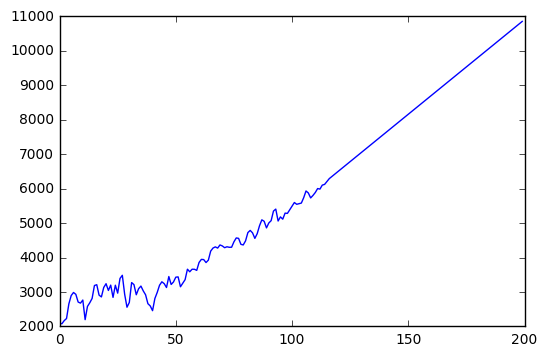

In [123]:
plt.plot(scores)
plt.show()


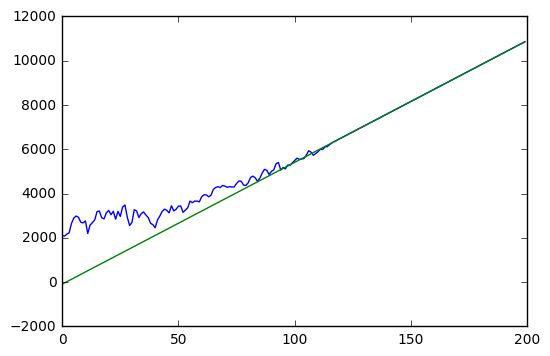

2749999999910.9995


In [132]:

x = range(150,150+len(scores[150:]))
y = scores[150:]

# assert len(x) == len(y)

fit = np.polyfit(x, y, 1)
fit_fn = np.poly1d(fit) 

scores
x = np.array(range(len(scores)))
# print(len(x))
plt.plot(x, scores, x, fit_fn(x))
plt.show()

print(fit_fn(50000000000))